In [1]:
import pandas as pd
# from sklearn.metrics import f1_score, confusion_matrix
import sklearn.metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../output/test-xception-27-class.csv",index_col=0)
cols = ['Akashiwo', 'Alexandrium_singlet', 'Amy_Gony_Protoc',
       'Asterionellopsis', 'Centric', 'Ceratium', 'Chaetoceros',
       'Cochlodinium', 'Cryptophyte', 'Cyl_Nitz', 'Det_Cer_Lau', 'Dictyocha',
       'Dinophysis', 'Eucampia', 'Guin_Dact', 'Gymnodinium', 'Lingulodinium',
       'NanoP_less10', 'Pennate', 'Peridinium', 'Prorocentrum',
       'Pseudo-nitzschia', 'Scrip_Het', 'Skeletonema', 'Small_Misc',
       'Thalassionema', 'Thalassiosira']

In [6]:
def get_top_prob(row):
    return row[cols].max()

def get_top_class(row):
    ix = row[cols].values.argmax()
    return cols[ix]

In [7]:
df['top_prob'] = df.apply(get_top_prob,axis=1)
df['top_class'] = df.apply(get_top_class,axis=1)
df.head()

Akashiwo  Alexandrium_singlet  Amy_Gony_Protoc  Asterionellopsis  \
0  3.643335e-02         3.703631e-02     3.634618e-13      3.298333e-11   
1  4.305641e-07         6.447293e-07     5.340008e-19      1.139342e-11   
2  2.894400e-09         1.942691e-11     1.702160e-20      7.357341e-16   
3  7.277916e-08         6.437637e-07     3.332155e-12      3.158287e-13   
4  3.838481e-09         1.258375e-05     1.941304e-13      1.434935e-13   

    Centric      Ceratium   Chaetoceros  Cochlodinium   Cryptophyte  \
0  0.000077  1.508976e-07  5.209900e-08  3.495489e-01  4.260178e-11   
1  0.706315  6.091461e-11  2.691498e-12  1.386511e-05  2.514030e-16   
2  0.001728  2.307021e-11  8.756634e-11  1.430911e-07  8.896374e-16   
3  0.002538  5.260315e-08  2.961701e-09  2.087904e-08  1.865664e-13   
4  0.000018  2.181016e-08  6.477243e-04  4.840257e-10  2.658062e-13   

       Cyl_Nitz  ...     Scrip_Het   Skeletonema    Small_Misc  Thalassionema  \
0  3.214503e-13  ...  2.720055e-09  2.505857e-08  1.406115e-15   1.710424e-08   
1  1.401780e-15  ...  1.938665e-12  8.955665e-12  2.173781e-14   4.189471e-11   
2  3.260169e-17  ...  1.280066e-16  6.588971e-15  3.729881e-18   8.016211e-13   
3  1.273282e-13  ...  6.069182e-10  1.520793e-08  1.008299e-12   2.568823e-11   
4  2.609256e-10  ...  8.254385e-11  1.020806e-02  3.669887e-16   8.220896e-09   

   Thalassiosira                                             fnames  \
0       0.575659  /hb/home/pcdaniel/ifcb-training/training-sorte...   
1       0.293669  /hb/home/pcdaniel/ifcb-training/training-sorte...   
2       0.998272  /hb/home/pcdaniel/ifcb-training/training-sorte...   
3       0.997330  /hb/home/pcdaniel/ifcb-training/training-sorte...   
4       0.883917  /hb/home/pcdaniel/ifcb-training/training-sorte...   

                                 base          class  top_prob      top_class  
0  D20151111T223400_IFCB104_00358.png  Thalassiosira  0.575659  Thalassiosira  
1  D20151111T224534_IFCB104_00383.png  Thalassiosira  0.706315        Centric  
2  D20151111T234956_IFCB104_00226.png  Thalassiosira  0.998272  Thalassiosira  
3  D20151123T193801_IFCB104_00083.png  Thalassiosira  0.997330  Thalassiosira  
4  D20151123T193801_IFCB104_00130.png  Thalassiosira  0.883917  Thalassiosira  

[5 rows x 32 columns]

In [15]:
f1_score(df['class'], df['top_class'],average="weighted")

0.9140665394965917

In [23]:
f1_score = sklearn.metrics.f1_score(df['class'], df['top_class'],average="weighted")
accuracy = sklearn.metrics.accuracy_score(df['class'], df['top_class'],normalize=True)
print(sklearn.metrics.classification_report(df['class'], df['top_class'],labels=cols))

/Users/patrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     precision    recall  f1-score   support

           Akashiwo       0.99      0.99      0.99      4060
Alexandrium_singlet       0.71      0.80      0.75       169
    Amy_Gony_Protoc       0.72      0.82      0.77        44
   Asterionellopsis       0.95      0.99      0.97       273
            Centric       0.86      0.93      0.90      6267
           Ceratium       0.99      1.00      0.99       500
        Chaetoceros       0.96      0.94      0.95      2590
       Cochlodinium       0.92      0.83      0.87       416
        Cryptophyte       0.78      0.88      0.83       233
           Cyl_Nitz       0.90      0.96      0.93       164
        Det_Cer_Lau       0.93      0.91      0.92       646
          Dictyocha       0.92      0.86      0.89       101
         Dinophysis       0.98      0.94      0.96       360
           Eucampia       0.92      0.98      0.95       298
          Guin_Dact       0.99      0.76      0.86       108
        Gymnodinium    

/Users/patrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/patrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
mat = pd.DataFrame(columns=cols, data = np.zeros((len(cols), len(cols))))
# mat = mat.append([0]*len(cols),i /gnore_index=True)
for i, true_class in enumerate(cols):
    t = df[df['class'] == true_class]
    tc = t['top_class'].values
    mat.iloc[i] = np.array([len(np.where(tc == col)[0]) for col in cols]) / len(tc)

In [97]:
mat.index = mat.columns

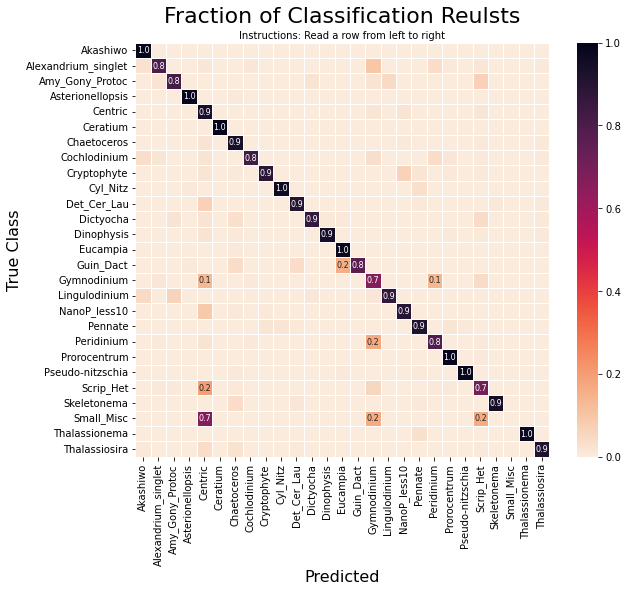

In [151]:
# sns.color_palette("rocket", as_cmap=True)
an = np.vectorize(lambda x: '' if x<0.1 else "{:.1f}".format(x))(mat.to_numpy())



fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(mat,ax=ax,cmap="rocket_r",square=True,vmin=0,vmax=1,linewidths=.5, annot=an, fmt = "",annot_kws={"size": 8})
ax.set_ylabel("True Class",size=16)
ax.set_xlabel("Predicted", size=16)
plt.subplots_adjust(top=.7)
plt.title("Fraction of Classification Reulsts", size=22, pad=20)
ax.text(x=.25,y=1.01, s="Instructions: Read a row from left to right",transform=ax.transAxes)
plt.savefig("./figures/27-class-prediction-matrix.png",dpi=300,bbox_inches='tight')